In [13]:
import pandas as pd
import numpy as np

In [14]:
import pandas as pd

# List of possible encodings to try
encodings = ['utf-8', 'latin1', 'ISO-8859-1', 'cp1252']

file_path =r"/content/spam.csv"

# Assuming the file has a .csv extension

# Attempt to read the CSV file with different encodings
for encoding in encodings:
    try:
        df = pd.read_csv(file_path, encoding=encoding)
        print(f"File successfully read with encoding: {encoding}")
        break  # Stop the loop if successful
    except UnicodeDecodeError:
        print(f"Failed to read with encoding: {encoding}")
        continue  # Try the next encoding

# If the loop completes without success, df will not be defined
if 'df' in locals():
    print("CSV file has been successfully loaded.")
else:
    print("All encoding attempts failed. Unable to read the CSV file.")


Failed to read with encoding: utf-8
File successfully read with encoding: latin1
CSV file has been successfully loaded.


In [15]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
524,spam,"URGENT!: Your Mobile No. was awarded a å£2,000...",NaN,NaN,NaN
3941,ham,She's borderline but yeah whatever.,NaN,NaN,NaN
2417,ham,Oh... Lk tt den we take e one tt ends at cine ...,NaN,NaN,NaN
1266,ham,\Hey sorry I didntgive ya a a bellearlier hunny,just been in bedbut mite go 2 thepub l8tr if u...,NaN,NaN
1196,ham,What he said is not the matter. My mind saying...,NaN,NaN,NaN


In [16]:
df.shape

(5572, 5)

In [17]:
#1.data cleanning
#2.EDA
#3.Text preprocessing
#4.Model building
#5.evaluation
#6.Improvement
#7.website
#8.Deploy


**DATA CLEANING**

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [19]:
df.drop(columns=["Unnamed: 2", "Unnamed: 3","Unnamed: 4"],inplace=True) # removed trailing space from "Unnamed: 2 "

In [20]:
df.sample(5)

,v1,v2
3576,ham,Yeah confirmed for you staying at that weekend
1288,ham,Happy new year to u too!
342,ham,Where u been hiding stranger?
770,ham,Not getting anywhere with this damn job huntin...
1826,ham,Dude. What's up. How Teresa. Hope you have bee...


In [21]:
df.rename(columns={"v1":"target","v2":"text"},inplace=True)
df.sample(5)

,target,text
605,ham,TaKe CaRE n gET WeLL sOOn
4512,spam,Money i have won wining number 946 wot do i do...
4250,ham,Omg Joanna is freaking me out. She's looked th...
957,ham,Welp apparently he retired
4513,ham,"Sure, whenever you show the fuck up &gt;:("


In [22]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df["target"]=encoder.fit_transform(df["target"])

In [23]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [24]:
df.isnull().sum()


,0
target,0
text,0


In [25]:
df.duplicated().sum()

403

In [26]:
df=df.drop_duplicates(keep="first")

In [27]:
df.duplicated().sum()

0

In [28]:
df.shape

(5169, 2)

**EDA**

In [29]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [30]:
df['target'].value_counts()

,count
target,
0,4516
1,653


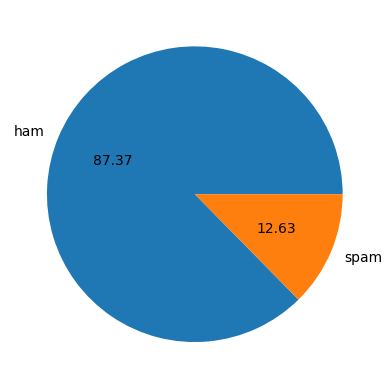

In [31]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=["ham","spam"],autopct="%0.2f") # Use value_counts() to get a count of unique values
plt.show()

In [32]:
import nltk

In [33]:
!pip install nltk

In [34]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [35]:
df['num_characters'] = df['text'].apply(len)

In [36]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [37]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [38]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [39]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [40]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [41]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [42]:
#targeting ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [43]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

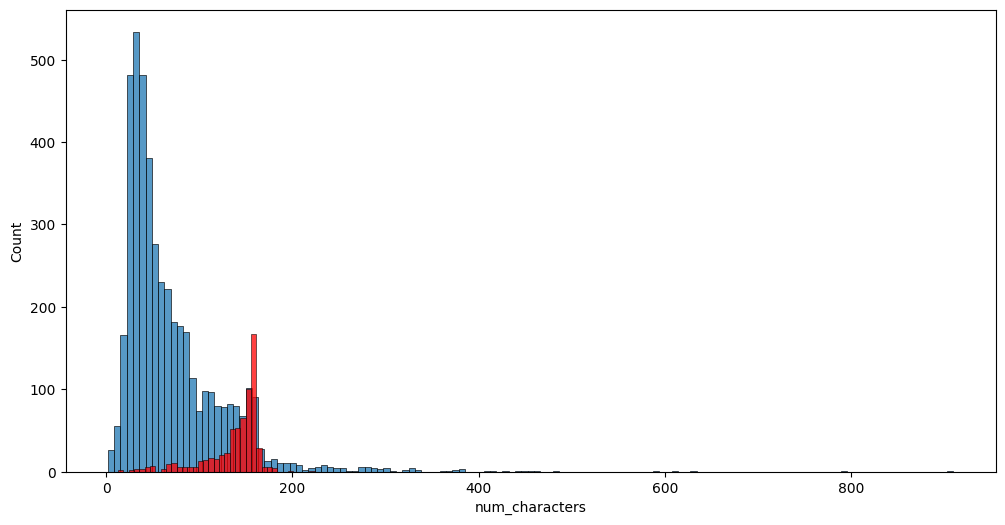

In [44]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

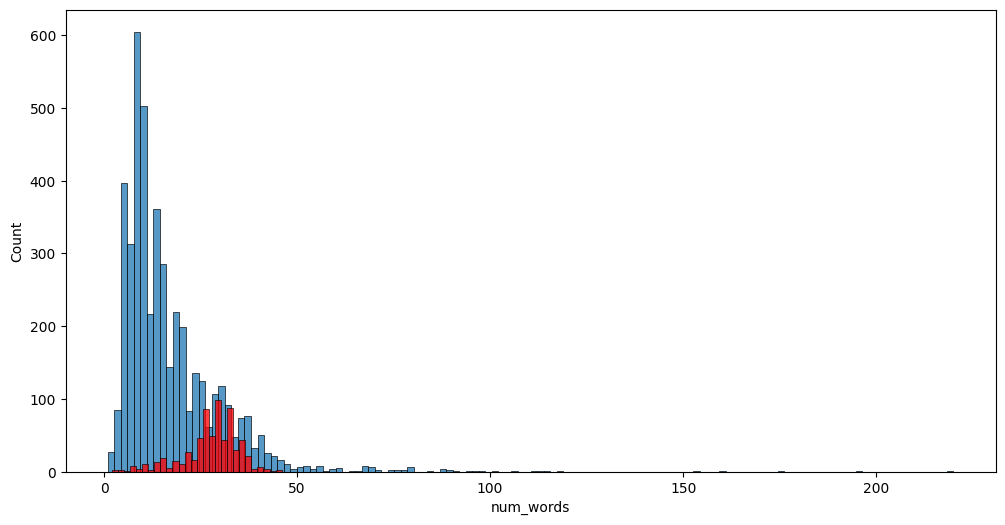

In [45]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

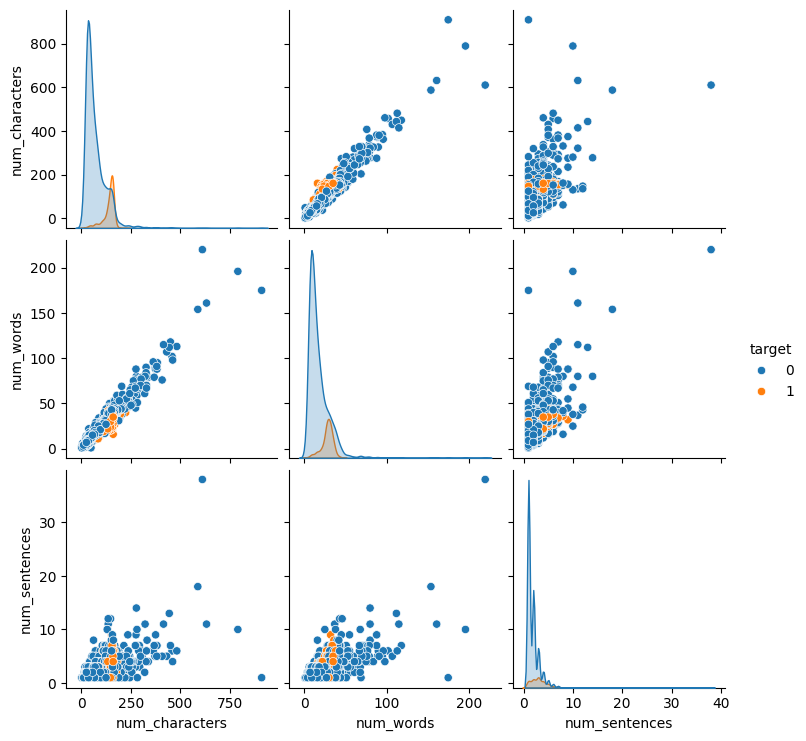

In [46]:
sns.pairplot(df,hue='target')

<Axes: >

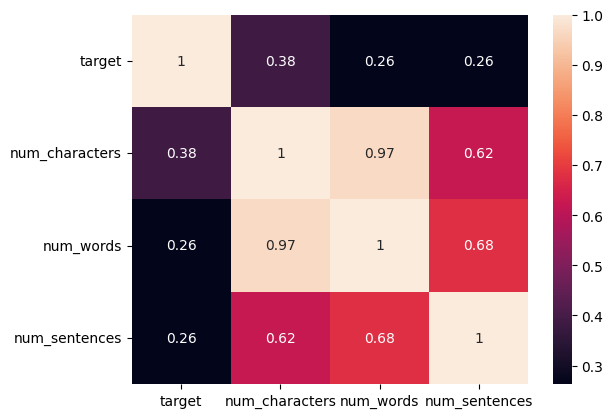

In [47]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

**Data processing**
-lower case

-tokenization

-removing special character

-removing stop words and punctuation

-stemming

In [85]:
import seaborn as sns
import nltk
nltk.download('stopwords')
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [86]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)



In [87]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")


'gon na home soon want talk stuff anymor tonight k cri enough today'

In [88]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [89]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('walkig')

'walkig'

In [90]:
df['transformed_text'] = df['text'].apply(transform_text)


In [91]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [92]:
from os import WCONTINUED
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [93]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

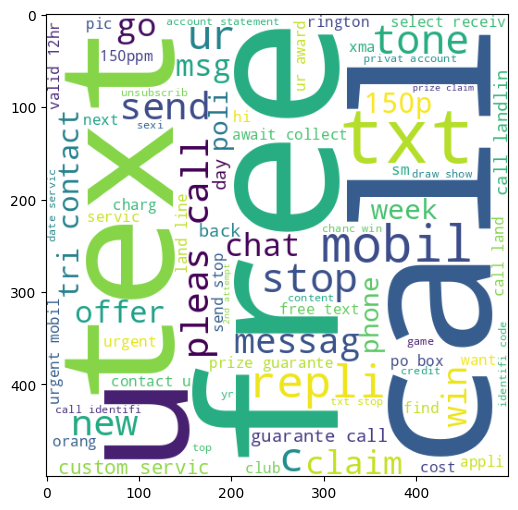

In [94]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [95]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

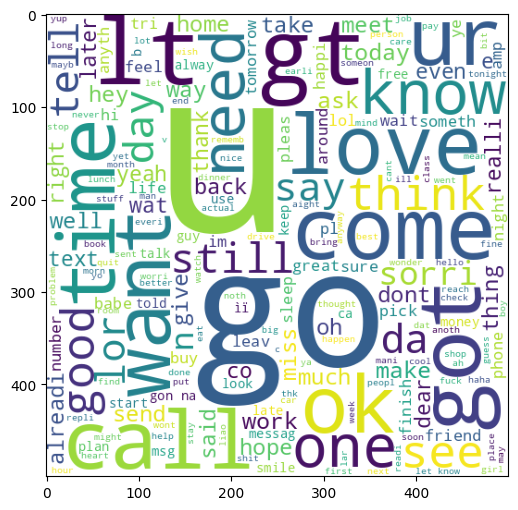

In [96]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [97]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [98]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [99]:
len(spam_corpus)

9939

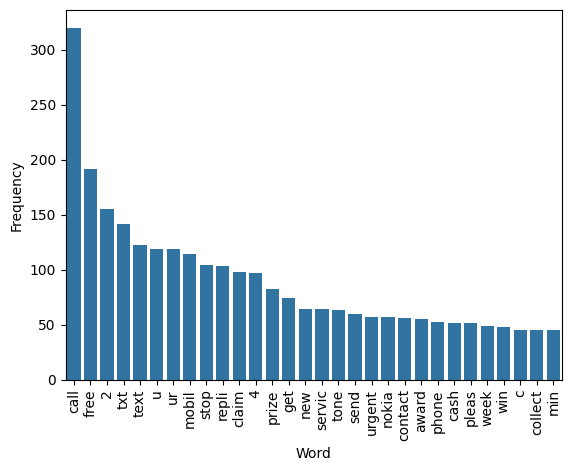

In [100]:
from collections import Counter


# Convert the Counter object to a Pandas DataFrame
df_spam_corpus = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Frequency'])

# Use the 'x' and 'y' arguments to specify the columns for the barplot
sns.barplot(x='Word', y='Frequency', data=df_spam_corpus)

plt.xticks(rotation='vertical')
plt.show()

In [101]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [102]:
len(ham_corpus)

35404

In [103]:
df.head

<bound method NDFrame.head of       target                                               text  \
0          0  Go until jurong point, crazy.. Available only ...   
1          0                      Ok lar... Joking wif u oni...   
2          1  Free entry in 2 a wkly comp to win FA Cup fina...   
3          0  U dun say so early hor... U c already then say...   
4          0  Nah I don't think he goes to usf, he lives aro...   
...      ...                                                ...   
5567       1  This is the 2nd time we have tried 2 contact u...   
5568       0              Will Ì_ b going to esplanade fr home?   
5569       0  Pity, * was in mood for that. So...any other s...   
5570       0  The guy did some bitching but I acted like i'd...   
5571       0                         Rofl. Its true to its name   

      num_characters  num_words  num_sentences  \
0                111         24              2   
1                 29          8              2   
2                155         37              2   
3                 49         13              1   
4                 61         15              1   
...              ...        ...            ...   
5567             161         35              4   
5568              37          9              1   
5569              57         15              2   
5570             125         27              1   
5571              26          7              2   

                                       transformed_text  
0     go jurong point crazi avail bugi n great world...  
1                                 ok lar joke wif u oni  
2     free entri 2 wkli comp win fa cup final tkt 21...  
3                   u dun say earli hor u c alreadi say  
4                  nah think goe usf live around though  
...                                                 ...  
5567  2nd time tri 2 contact u pound prize 2 claim e...  
5568                              b go esplanad fr home  
5569                                  piti mood suggest  
5570  guy bitch act like interest buy someth els nex...  
5571                                     rofl true name  

[5169 rows x 6 columns]>

**building the model**

In [104]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [105]:
x =tfidf.fit_transform(df['transformed_text']).toarray()

In [106]:
x.shape

(5169, 3000)

In [107]:
y=  df['target'].values

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [110]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [111]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [112]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]


In [113]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]


In [114]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]


In [115]:
!pip install xgboost

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [117]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gdbt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [118]:
clfs={
    'SVC' : svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gdbt,
    'xgb':xgb

}

In [119]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
  clf.fit(x_train,y_train)
  y_pred=clf.predict(x_test)
  accuracy=accuracy_score(y_test,y_pred)
  precision=precision_score(y_test,y_pred)

  return accuracy,precision

In [120]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [123]:
  accuracy_scores=[]
  precision_scores=[]
  for name,clf in clfs.items():
    current_accuracy,current_precision=train_classifier(clf,x_train,y_train,x_test,y_test)

In [127]:
accuracy_scores.append(current_accuracy) # append the values to the lists
precision_scores.append(current_precision) # append the values to the list


In [129]:
print(len(clfs.keys()))
print(len(accuracy_scores))
print(len(precision_scores))


11
2
2


In [132]:
import pandas as pd
import numpy as np

# Ensure lists are the same length as clfs.keys() before creating DataFrame
if len(accuracy_scores) < len(clfs.keys()):
  accuracy_scores += [np.nan] * (len(clfs.keys()) - len(accuracy_scores))

if len(precision_scores) < len(clfs.keys()):
  precision_scores += [np.nan] * (len(clfs.keys()) - len(precision_scores))

performance_df = pd.DataFrame({
    'Algorithm': list(clfs.keys()),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores
}).sort_values('Precision', ascending=False)


In [133]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.967118,0.92623
1,KN,0.967118,0.92623
2,NB,NaN,NaN
3,DT,NaN,NaN
4,LR,NaN,NaN
5,RF,NaN,NaN
6,AdaBoost,NaN,NaN
7,BgC,NaN,NaN
8,ETC,NaN,NaN
9,GBDT,NaN,NaN


In [134]:
performance_df1=pd.melt(performance_df,id_vars='Algorithm')

In [135]:
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.967118
1,KN,Accuracy,0.967118
2,NB,Accuracy,NaN
3,DT,Accuracy,NaN
4,LR,Accuracy,NaN
5,RF,Accuracy,NaN
6,AdaBoost,Accuracy,NaN
7,BgC,Accuracy,NaN
8,ETC,Accuracy,NaN
9,GBDT,Accuracy,NaN


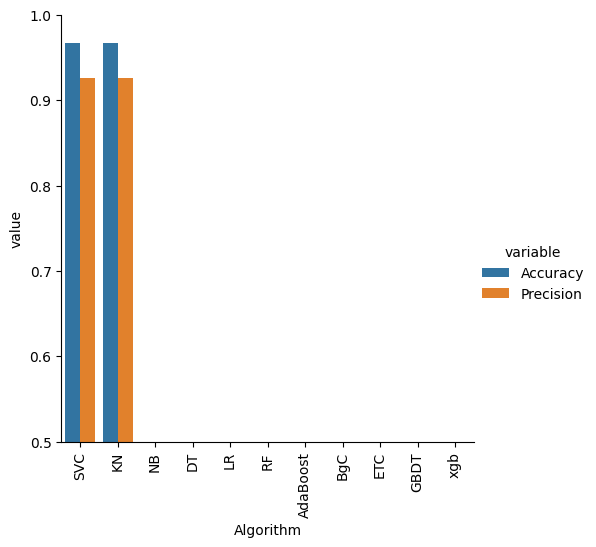

In [136]:
sns.catplot(x='Algorithm',y='value',hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [144]:
temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [148]:
df=performance_df.merge(temp_df,on='Algorithm')

In [149]:
df.scaled=df.merge(temp_df,on='Algorithm')

<ipython-input-149-0642d3ab0ee3>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.scaled=df.merge(temp_df,on='Algorithm')


In [150]:
temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [151]:
new_df_scaled=performance_df.merge(temp_df,on='Algorithm')

In [158]:
#voting classifier
svc=SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb=MultinomialNB()
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
from sklearn.ensemble import VotingClassifier

In [159]:
voting=VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [160]:
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [161]:
y_pred=voting.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [162]:
estimators=[('svm', svc),('nb',mnb),('et', etc)]
final_estimator=LogisticRegression()

In [163]:
from sklearn.ensemble import StackingClassifier

In [164]:
clf=StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [ ]:
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

In [166]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [169]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB


x_train =["sample text 1", "sample text 2", "sample text 3"]
y_train = [0, 1, 0]

tfidf=TfidfVectorizer(max_features=3000)
x_train_transformed=tfidf.fit_transform(x_train).toarray()

mnb = MultinomialNB()
mnb.fit(x_train_transformed, y_train)

with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf,vectorizer_file)

with open('model.pkl', 'wb') as  model_file:
    pickle.dump(mnb, model_file)
